In [31]:
#Task 1
f = open('../NLTK/BIO_CS_DATA/TEST/biology/class_11_biology_chapter_1_0.txt', encoding = 'utf-8')
text  = f.read().lower()
print(text)

chapter 1
the living world

chapter 2
biological classification

chapter 3
plant kingdom

chapter 4
animal kingdom

 

unit i

diversity in the living world

biology is the science of life forms and living processes. the living world
comprises an amazing diversity of living organisms. early man could
easily perceive the difference between inanimate matter and living
organisms. early man deified some of the inanimate matter (wind, sea,
fire etc.) and some among the animals and plants. a common feature of
all such forms of inanimate and animate objects was the sense of awe
or fear that they evoked. the description of living organisms including
human beings began much later in human history. societies which
indulged in anthropocentric view of biology could register limited
progress in biological knowledge. systematic and monumental
description of life forms brought in, out of necessity, detailed systems
of identification, nomenclature and classification. the biggest spin off
of such studi

In [42]:
#Task 2
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import casual_tokenize
from nltk.tokenize import MWETokenizer

sent_list = sent_tokenize(text)
word_set = set(word_tokenize(text))
casual_set = set(casual_tokenize(text))
MWE_list = MWETokenizer(text)
MWE_set = set(MWE_list.tokenize(word_tokenize(text)))

#In the following for I removed '\n', double space and triple space
for index in range(len(sent_list)):
    sent_list[index] = sent_list[index].replace('\n', ' ')
    sent_list[index] = sent_list[index].replace('  ', ' ')
    sent_list[index] = sent_list[index].replace('   ', ' ')
    
sent_set = set(sent_list)

print("Number of sentences extracted by 'sent_tokenize' : ", len(sent_set))
print("Number of distinct tokens extracted by 'word_tokenize' : ", len(word_set))
print("Number of distinct tokens extracted by 'casual_tokenize' : ", len(casual_set))
print("Number of distinct tokens extracted by 'MWETokenizer' : ", len(MWE_set))

index = 1
for sent in sent_set:
    print('Sentence ', index, ' : ', (len(word_tokenize(sent)) 
                                      + len(casual_tokenize(sent)) 
                + len(MWETokenizer(sent).tokenize(word_tokenize(sent)))) / 3
          , ' tokens')
    index += 1

Number of sentences extracted by 'sent_tokenize' :  13
Number of distinct tokens extracted by 'word_tokenize' :  134
Number of distinct tokens extracted by 'casual_tokenize' :  134
Number of distinct tokens extracted by 'MWETokenizer' :  134
Sentence  1  :  23.0  tokens
Sentence  2  :  14.0  tokens
Sentence  3  :  8.0  tokens
Sentence  4  :  23.0  tokens
Sentence  5  :  39.0  tokens
Sentence  6  :  17.0  tokens
Sentence  7  :  11.0  tokens
Sentence  8  :  15.0  tokens
Sentence  9  :  23.0  tokens
Sentence  10  :  16.0  tokens
Sentence  11  :  28.0  tokens
Sentence  12  :  1.0  tokens
Sentence  13  :  35.0  tokens


In [53]:
#Task 3
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

all_tokens = word_set.union(casual_set, MWE_set)
stemmers = {'original_token' : [],
            'Porter' : [],
            'Lancaster' : [],
            'Snowball' : []}
for token in all_tokens:
    stemmers['original_token'].append(token)
    stemmers['Porter'].append(PorterStemmer().stem(token))
    stemmers['Lancaster'].append(LancasterStemmer().stem(token))
    stemmers['Snowball'].append(SnowballStemmer('english').stem(token))

import pandas as pd

stemmers_dataframe = pd.DataFrame(stemmers)

stemmers_dataframe

,original_token,Porter,Lancaster,Snowball
0,1,1,1,1
1,indulged,indulg,indulg,indulg
2,common,common,common,common
3,.,.,.,.
4,register,regist,reg,regist
...,...,...,...,...
129,necessity,necess,necess,necess
130,world,world,world,world
131,processes,process,process,process
132,3,3,3,3


10 most frequent tokens :  [('of', 17), ('the', 13), ('.', 12), ('and', 11), ('living', 9), (',', 9), ('in', 6), ('organisms', 6), ('chapter', 4), ('a', 4)]


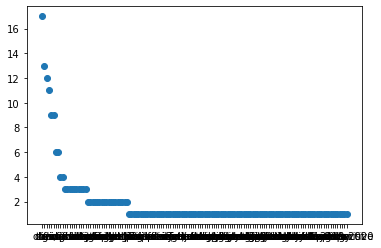

In [75]:
#Task 4
from nltk.probability import FreqDist

token_freq = FreqDist(casual_tokenize(text))
most_freq_10 = token_freq.most_common(10)

print('10 most frequent tokens : ', most_freq_10)

token_hepax = token_freq.hapaxes()

import matplotlib.pyplot as plt

tokens_to_plot = token_freq.most_common(len(casual_tokenize(text)))

tokens = []
freq = []
for token in tokens_to_plot:
    tokens.append(token[0])
    freq.append(token[1])
    
plt.scatter(tokens, freq)
plt.show()

#It is not similar to zipf law, because of few number of words?

In [83]:
#task 5
from nltk import pos_tag

token_pos = pos_tag(word_tokenize(text))

token_pos_dic = {}
for token in token_pos:
    if token[1] not in token_pos_dic:
        token_pos_dic[token[1]] = []
    token_pos_dic[token[1]].append(token[0])

for elem in token_pos_dic:
    print(elem, token_pos_dic[elem], '\n')

#I think that from the output can be easily seen what are the most common
#part of speech and what is the part of speech that has the smallest freq

NN ['chapter', 'living', 'world', 'chapter', 'classification', 'chapter', 'plant', 'kingdom', 'chapter', 'kingdom', 'unit', 'diversity', 'living', 'world', 'biology', 'science', 'life', 'living', 'living', 'world', 'diversity', 'living', 'man', 'difference', 'matter', 'man', 'matter', 'wind', 'sea', 'fire', 'etc', 'feature', 'inanimate', 'sense', 'awe', 'fear', 'description', 'living', 'history', 'view', 'biology', 'progress', 'knowledge', 'description', 'life', 'necessity', 'identification', 'nomenclature', 'classification', 'spin', 'recognition', 'sharing', 'living', 'day', 'living', 'earth', 'revelation', 'man', 'conservation', 'biodiversity', 'unit', 'description', 'classification', 'taxonomist', 's', 'perspective'] 

CD ['1', '2', '3', '4'] 

DT ['the', 'the', 'the', 'the', 'an', 'the', 'some', 'the', 'some', 'the', 'a', 'all', 'the', 'the', 'the', 'the', 'the', 'both', 'all', 'each', 'all', 'this', 'a', 'the', 'this', 'a', 'a'] 

JJ ['biological', 'animal', 'i', 'amazing', 'early